# Thats How i imagined the design of the Streamlit website, and then I wrote the code to match that design.

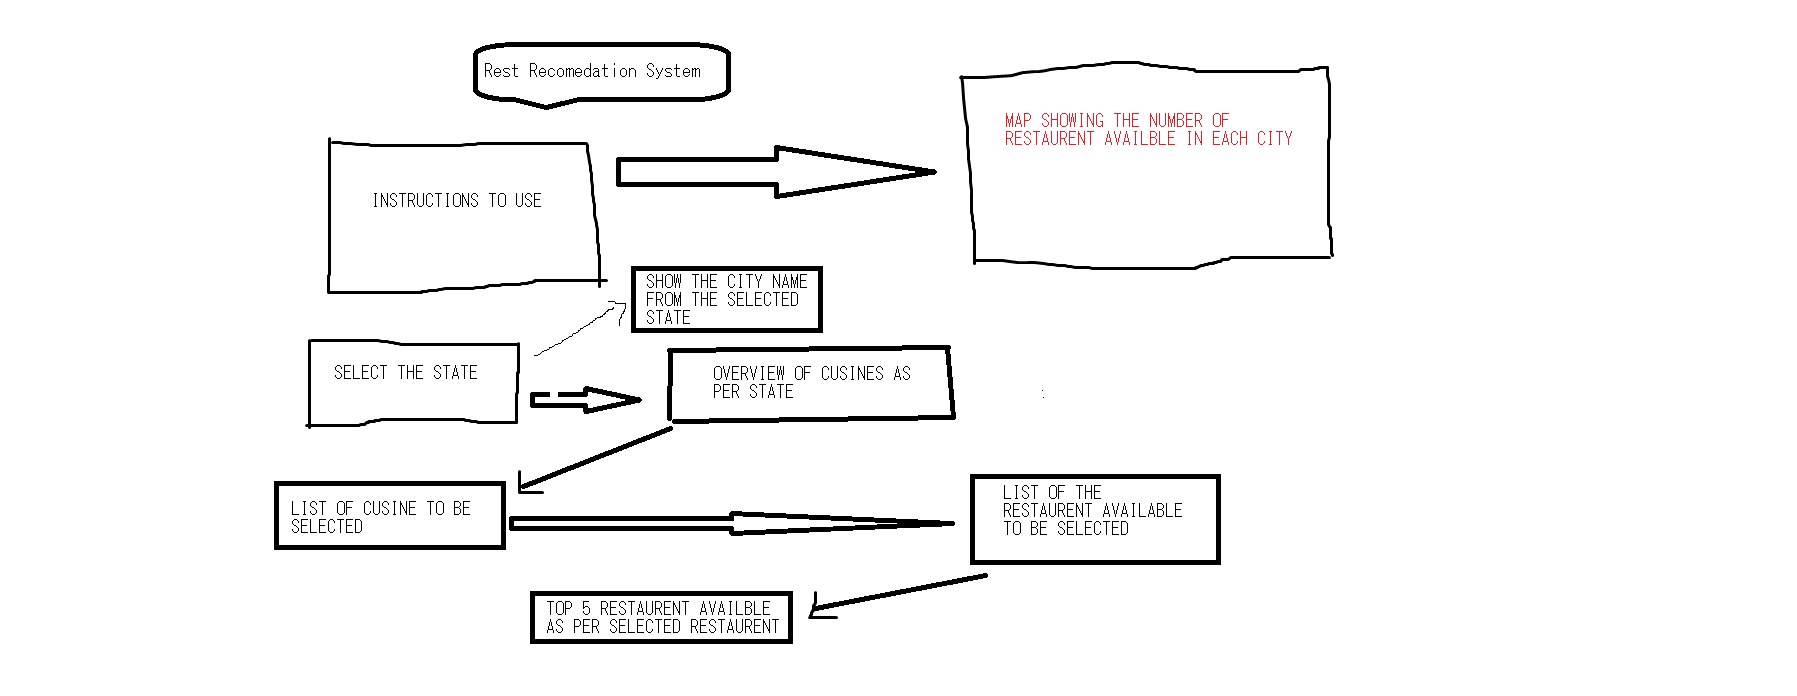

In [27]:
from IPython.display import Image

image_path = r"C:\Users\312tx asus\Desktop\Faltu Projects\NLP BASED\newR\Untitled.png"
Image(filename=image_path)

In [28]:
class ZRecomand:
    
    def __init__(self):
        self.df=pickle.load(open('newdata.pkl','rb'))
        self.TotalRestaAvailableInEachCity()
        self.similarity=pickle.load(open('similarity.pkl','rb'))
                
    def TotalRestaAvailableInEachCity(self):
        try:
            # reading the geo file
            fp = "C:\\Users\\312tx asus\\Desktop\\Faltu Projects\\NLP BASED\\newR\\Maps_with_python-master\\india-polygon.shp"
            map_df = gpd.read_file(fp)
            map_df_copy = gpd.read_file(fp)

            # creating a df with state count
            m = []
            for i, j in self.df['state'].value_counts().items():
                m.append({'State': i, 'Count': j})

            statedf = pd.DataFrame(m)

            #Merging the data
            merged = map_df.set_index('st_nm').join(statedf.set_index('State'))
            merged['Count'] = merged['Count'].replace(np.nan, 0)

            # Create figure and axes for Matplotlib and set the title
            fig, ax = plt.subplots(1, figsize=(10, 10))
            ax.axis('off')
            ax.set_title('Number of Restaurants Available Per State', fontdict={'fontsize': '20', 'fontweight': '10'})

            # Plot the figure
            merged.plot(column='Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True)

            # Save the figure to a buffer
            buffer = BytesIO()
            plt.savefig(buffer, format='png')
            plt.close(fig)

            # Rewind the buffer and display the plot using st.image()
            buffer.seek(0)
            st.image(buffer, caption='Number of Restaurants Available Per State', use_column_width=True)
        
        except FileNotFoundError:
            print("File Not Found. Please provide the correct path for the Geo Location File.")
        except KeyError:
            print("The 'State/st_nm' column is missing in the dataframe.")
        except Exception as e:
            print("An error occurred:", str(e))


    def choose_state(self):
        # Print the unique list of cities/states
        print(self.df['state'].unique().tolist())

        # Flag to track the validity of the selected state/city
        valid_state = False

        # Loop until a valid state/city is selected
        while not valid_state:
            try:
                # Prompt the user to choose a state/city
                self.rest = input("Choose a state/city from the above list for restaurant recommendations: ")

                # Check if the selected state/city is in the list of unique cities/states
                if self.rest not in self.df['state'].unique().tolist():
                    # Raise a ValueError if the input is not in the list
                    raise ValueError("INVALID STATE/CITY SELECTED")

                # Set the flag to True if a valid city/state is selected
                valid_state = True

            except ValueError as ve:
                # Print the custom error message for an invalid state/city selection
                print(str(ve))

            except Exception as e:
                print("Please choose a correct state/city from the above list")

# used to choose a city from the selected state                
    def choose_city(self):             
            print(self.df[self.df['state']==self.rest]['City'].unique().tolist())
            valid_city=False
            while not valid_city:
                try:
                    self.choosencity=input("Choose a city from the above list for restaurant recommendations: ")
                    if self.choosencity not in self.df[self.df['state']==self.rest]['City'].unique().tolist():
                        raise ValueError("INVALID CITY")
                        
                    valid_city=True
                    
                except ValueError as VE:
                    print(str(VE))
                    
                except Exception as e:
                    print("Please choose a correct city from the above list")

            
            
#Total Number of Restaurent in Selected State
    def total_rest_incity(self):
        print("The number of Restaurent Available in the city : ",self.df[self.df['City']==self.choosencity].shape[0])
        print("Most Famous Cusines as per selected City")
        self.cusines_asper_city()
# Overview of Most famous cusines  as per that state        
    def cusines_asper_city(self):
        values = new.df[new.df['City']==self.choosencity]['Cuisines'].dropna().tolist()
        # Concatenate the values into a single string
        text = ' '.join(values)
        # Create the WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
# list of unique cusines available in that state        
    def selectCusine(self):
        newdata=new.df[new.df['City']==self.choosencity]
        cu=[]
        for i in newdata['Cuisines']:
                cusine=i.split(", ")
                for j in cusine:
                    if j not in cu:
                        cu.append(j)            
        print("List of all Cusines Available",cu)
        valid_cuisine=False
        while not valid_cuisine:
            try:
                self.choosencusine=input("Please select a cusine fro above cusine list")
                if self.choosencusine not in cu:
                    raise ValueError("INVALID CUSINE")
                    
                valid_cuisine=True
                
            except ValueError as ve:
                print(str(ve))
                
            except Exception as e:
                print(e)
        
# list of rest as per state,city and cusine    
    def restnamepercity(self):
        restpercity=new.df[new.df['City'] == self.choosencity][new.df[new.df['City']==self.choosencity]['Cuisines'].str.contains(self.choosencusine,case=False)]['Restaurant Name'].unique().tolist()
        print(restpercity)
        valid_restname=False
        while not valid_restname:
            try:
                self.restn=input("Enter the restaurent Name: ")
                if self.restn not in restpercity:
                    raise ValueError("INVALID REST NAME")
                 
                valid_restname=True
            
            
            except ValueError as ve:
                print(str(ve))
                
            except Exception as e:
                print(e)
                

    def top5similarResAcroosTheCity(self):
        index = self.df[self.df['Restaurant Name'] == self.restn].index[0]
        n = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        l_index = []
        count = 0

        for i in n:
            if count < 6:
                l_index.append(i[0])
                count += 1

        l_index = l_index[1:]

        rest = []
        for i in l_index:
            rest.append(self.df.loc[i]['Restaurant Name'])

        return rest

# todo whole detail about top 5 restaurent avg price ,  avg rating,locailty
# then a function to the whole address
# then a link to direct visit on google or something

In [29]:
new=ZRecomand()

In [30]:
new.choose_state()

['Uttar Pradesh', 'Gujarat', 'Punjab', 'Maharashtra', 'Karnataka', 'Madhya Pradesh', 'Odisha', 'Chandigarh', 'Tamil Nadu', 'Uttarakhand', 'Haryana', 'Goa', 'Assam', 'Telangana', 'Rajasthan', 'Kerala', 'West Bengal', 'Delhi', 'Bihar', 'Puducherry', 'Jharkhand', 'Andhra Pradesh']
Choose a state/city from the above list for restaurant recommendations: Haryana


In [21]:
new.choose_city()

['Faridabad', 'Gurgaon', 'Panchkula']
Choose a city from the above list for restaurant recommendations: Faridabad


The number of Restaurent Available in the city :  251
Most Famous Cusines as per selected City


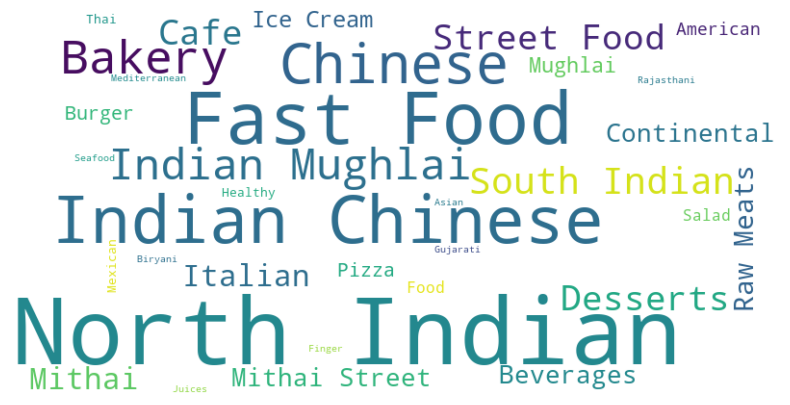

In [22]:
new.total_rest_incity()

In [23]:
new.selectCusine()

List of all Cusines Available ['Chinese', 'Fast Food', 'Bakery', 'North Indian', 'Mithai', 'Mughlai', 'Cafe', 'Raw Meats', 'Burger', 'South Indian', 'Gujarati', 'Rajasthani', 'Thai', 'Desserts', 'American', 'Salad', 'Healthy Food', 'Ice Cream', 'Continental', 'Beverages', 'Italian', 'Pizza', 'Street Food', 'Mexican', 'Juices', 'Asian', 'Seafood', 'Biryani', 'Mediterranean', 'Finger Food']
Please select a cusine fro above cusine listChinese


In [24]:
new.restnamepercity()

['Desire Foods', 'Knight Rock', 'Snax Points', 'Total Food Court', 'Kolkata Hot Kathi Rolls', 'Fusion Food Corner', "Berco's", 'Yo! China', 'Shree Rathnam', 'Angaar', 'The Retriever', 'Silver', 'The Grillz & Gravy', 'Cafe Light', 'Momo-Cha', 'Oregano India', 'Welcome', 'New Dilight', 'Chimney', 'Chopstick', 'Hot & Tasty Chinese Food', 'Oxy Lounge', 'City Dhaba', 'Garam Masala', 'Al Bake', 'Anupam Sweet', 'Crispy Crust', 'The Grub House', 'Chickenette', "MD's Kebabs & Curries", 'China Hot Pot', 'Hungrill', 'Open Yard', 'The Chai Cafe', 'Chaudhary Chaap & Chinese', 'Chings Chinese', 'Food On Wheels', 'Maa Kali Foods', 'The Street Kitchen', 'Eat N Treat', 'Hotel Ekant', 'Paradise Inn', 'Red Chilli', 'Tmos Moving Feast', 'Parkash Dhaba', 'Food Station', 'Shiksha Fast Food', 'Oh My!', 'Butter & Grace', 'Snacks Bar', 'Oh My !', 'Anupama Sweets & Family Restaurant', "King's Kitchen", 'Desi Tadka', 'Destination Live', 'Le Chef Restro Bar', 'Tanishka Restaurant & Caterers', 'Twist of Italy', 'C

In [26]:
new.top5similarResAcroosTheCity()

['Snax Points', 'Rakheja Bakery', 'Momo-Cha', 'China Hot Pot', 'Oregano India']